# 5. Influence factors: Climate on Berry Microbiome 

In [4]:
#!mkdir /home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/lavaux/climate-berries

In [1]:
workdir = '/home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/lavaux/climate-berries'
%cd $workdir

/home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/lavaux/climate-berries


In [2]:
%env TMPDIR=/scratch/lfloerl/tmpdata

env: TMPDIR=/scratch/lfloerl/tmpdata


In [29]:
from qiime2 import Visualization
import qiime2 as q2
from qiime2 import Visualization
from qiime2 import Artifact
from qiime2 import Metadata
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from qiime2.plugins.diversity.visualizers import alpha_group_significance
from qiime2.plugins.feature_table.methods import (filter_samples, filter_seqs)

from sklearn.metrics import r2_score
import numpy as np


from qiime2.plugins import diversity as q2d

%matplotlib inline

In [16]:
md = Metadata.load('/home/lfloerl/microterroir/Microbiome/Metadata/ITS_Lavaux_Climate.tsv')
md.to_dataframe()

,SAMPLE_NAME,sample_type,Plot_ID,COLLECTION_DATE,Year,Year_Cat,Plot,Altitude,Average_slope,Exposition,...,maximum_rh,minimum_rh,cv_rh,GDD,average_temperature,median_temperature,maximum_temperature,minimum_temperature,accumulated_temperature,cv_temperature
id,,,,,,,,,,,,,,,,,,,,,
364526_290-LP3-ITS-0866,Lavaux_2021-08-31_bark_Plot4,bark,Lavaux_Plot_4,2021-08-31 00:00:00 +0200,2021.0,Year2021,4.0,450.0,30.0,South-West,...,99.036583,33.078261,16.567322,1325.721843,18.154261,18.650958,26.689636,8.401750,2940.990343,22.587667
364526_289-LP3-ITS-0865,Lavaux_2021-08-31_bark_Plot5,bark,Lavaux_Plot_5,2021-08-31 00:00:00 +0200,2021.0,Year2021,5.0,400.0,30.0,South-West,...,95.964333,32.830458,16.331714,1379.347141,18.494554,19.047366,26.351409,8.816375,2996.117777,22.104867
364526_285-LP3-ITS-0861,Lavaux_2021-08-31_bark_Plot9,bark,Lavaux_Plot_9,2021-08-31 00:00:00 +0200,2021.0,Year2021,9.0,520.0,35.0,South-West,...,98.181542,32.794125,16.570451,1286.254021,17.902585,18.256629,25.850773,8.052083,2900.218734,22.831881
364526_287-LP3-ITS-0863,Lavaux_2021-08-31_bark_Plot11,bark,Lavaux_Plot_11,2021-08-31 00:00:00 +0200,2021.0,Year2021,11.0,490.0,20.0,South,...,96.437167,32.357792,16.118351,1297.271087,17.964399,18.541438,26.775286,7.966542,2910.232671,23.246939
364526_282-LP3-ITS-0858,Lavaux_2021-08-31_bark_Plot12,bark,Lavaux_Plot_12,2021-08-31 00:00:00 +0200,2021.0,Year2021,12.0,520.0,15.0,South-West,...,97.113875,32.104636,16.661423,1286.822875,17.897069,18.244984,27.509143,7.779875,2899.325119,23.615955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364526_497-LP3-ITS-1073,Lavaux_2022-08-10_leaf_Plot11_washed,leaf,Lavaux_Plot_11,10.08.2022,2022.0,Year2022,11.0,490.0,20.0,South,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
364526_500-LP3-ITS-1076,Lavaux_2022-08-10_leaf_Plot13_washed,leaf,Lavaux_Plot_13,10.08.2022,2022.0,Year2022,13.0,580.0,30.0,South-West,...,91.051500,40.365391,18.779441,1667.574092,18.907507,20.375625,29.587261,0.558542,3441.166191,30.472148
364526_505-LP3-ITS-1081,Lavaux_2022-08-10_leaf_Plot9_washed,leaf,Lavaux_Plot_9,10.08.2022,2022.0,Year2022,9.0,520.0,35.0,South-West,...,95.741000,39.977136,19.630812,1742.827110,19.343256,20.624395,29.494636,1.002917,3520.472663,29.641663


# Diversity

In [31]:
!rm -r cm5000 kmer_cm5000

rm: das Entfernen von 'kmer_cm5000' ist nicht möglich: No such file or directory


In [ ]:
%%bash 

# subset to make sure that all samples have climate measurements
qiime feature-table filter-samples \
      --i-table /home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/lavaux/must_filtered_table.qza \
      --m-metadata-file /home/lfloerl/microterroir/Microbiome/Metadata/ITS_Lavaux_Climate.tsv \
      --p-where "[GDD] IS NOT NULL" \
      --o-filtered-table climate_filtered_table.qza

qiime feature-table filter-seqs \
        --i-data /home/lfloerl/cloud/lfloerl/Microterroir/artifacts/Sven-denoising-test/ITS/revcomp-trimmed-denoised/with-adjusted-parameters/ITS-revcomp-trimmed-ER-0.05-denoised-trunc-190-PFA-4.0-maxee-4.0-rep-seqs.qza \
        --i-table climate_filtered_table.qza \
        --o-filtered-data climate_filtered_rep_seqs.qza


# Core diversity metrics
qiime diversity core-metrics \
        --i-table climate_filtered_table.qza \
        --p-sampling-depth 5000 \
        --m-metadata-file /home/lfloerl/microterroir/Microbiome/Metadata/ITS_Lavaux_Climate.tsv \
        --p-n-jobs 5 \
        --output-dir cm5000/

# Kmer diversity
qiime kmerizer core-metrics \
    --i-sequences climate_filtered_rep_seqs.qza \
    --i-table climate_filtered_table.qza \
    --p-sampling-depth 5000 \
    --m-metadata-file /home/lfloerl/microterroir/Microbiome/Metadata/ITS_Lavaux_Climate.tsv \
    --p-n-jobs 'auto' \
    --p-max-features 5000 \
    --output-dir kmer_cm5000/

Saved FeatureTable[Frequency] to: climate_filtered_table.qza
Saved FeatureData[Sequence] to: climate_filtered_rep_seqs.qza
Saved FeatureTable[Frequency] to: cm5000/rarefied_table.qza
Saved SampleData[AlphaDiversity] to: cm5000/observed_features_vector.qza
Saved SampleData[AlphaDiversity] to: cm5000/shannon_vector.qza
Saved SampleData[AlphaDiversity] to: cm5000/evenness_vector.qza
Saved DistanceMatrix to: cm5000/jaccard_distance_matrix.qza
Saved DistanceMatrix to: cm5000/bray_curtis_distance_matrix.qza
Saved PCoAResults to: cm5000/jaccard_pcoa_results.qza
Saved PCoAResults to: cm5000/bray_curtis_pcoa_results.qza
Saved Visualization to: cm5000/jaccard_emperor.qzv
Saved Visualization to: cm5000/bray_curtis_emperor.qzv
Saved FeatureTable[Frequency] to: kmer_cm5000/rarefied_table.qza
Saved FeatureTable[Frequency] to: kmer_cm5000/kmer_table.qza
Saved SampleData[AlphaDiversity] to: kmer_cm5000/observed_features_vector.qza
Saved SampleData[AlphaDiversity] to: kmer_cm5000/shannon_vector.qza
Sav

# Mantel test with climate euclidian distance

### 1. Median temperature & RH 

In [17]:
%%bash 

div_dir='cm5000'
kmer_dir='kmer_cm5000'
output_dir="climate_mantel"

mkdir -p $output_dir

qiime diversity mantel \
    --i-dm1 /home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/ITS_euclidian_Temp_RH.qza \
    --i-dm2 $div_dir/bray_curtis_distance_matrix.qza \
    --p-intersect-ids \
    --o-visualization $output_dir/bray_curtis_mantel.qzv
    
qiime diversity mantel \
    --i-dm1 /home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/ITS_euclidian_Temp_RH.qza \
    --i-dm2 $div_dir/jaccard_distance_matrix.qza \
    --p-intersect-ids \
    --o-visualization $output_dir/jaccard_mantel.qzv
    
qiime diversity mantel \
    --i-dm1 /home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/ITS_euclidian_Temp_RH.qza \
    --i-dm2 $kmer_dir/bray_curtis_distance_matrix.qza \
    --p-intersect-ids \
    --o-visualization $output_dir/bray_curtis_kmer_mantel.qzv
    
qiime diversity mantel \
    --i-dm1 /home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/ITS_euclidian_Temp_RH.qza \
    --i-dm2 $kmer_dir/jaccard_distance_matrix.qza \
    --p-intersect-ids \
    --o-visualization $output_dir/jaccard_kmer_mantel.qzv

Saved Visualization to: climate_mantel/bray_curtis_mantel.qzv
Saved Visualization to: climate_mantel/jaccard_mantel.qzv
Saved Visualization to: climate_mantel/bray_curtis_kmer_mantel.qzv
Saved Visualization to: climate_mantel/jaccard_kmer_mantel.qzv


In [4]:
Visualization.load('climate_mantel/bray_curtis_mantel.qzv')

ValueError: climate_mantel/bray_curtis_mantel.qzv does not exist.

In [ ]:
Visualization.load('climate_mantel/jaccard_mantel.qzv')

In [ ]:
Visualization.load('climate_mantel/bray_curtis_kmer_mantel.qzv')

In [ ]:
Visualization.load('climate_mantel/jaccard_kmer_mantel.qzv')

### 2. Median, min and max temperature 

In [23]:
%%bash 

div_dir='cm5000'
kmer_dir='kmer_cm5000'
output_dir="temp_mantel"

mkdir -p $output_dir

qiime diversity mantel \
    --i-dm1 /home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/ITS_euclidian_Temp.qza \
    --i-dm2 $div_dir/bray_curtis_distance_matrix.qza \
    --p-intersect-ids \
    --o-visualization $output_dir/bray_curtis_mantel.qzv
    
qiime diversity mantel \
    --i-dm1 /home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/ITS_euclidian_Temp.qza \
    --i-dm2 $div_dir/jaccard_distance_matrix.qza \
    --p-intersect-ids \
    --o-visualization $output_dir/jaccard_mantel.qzv
    
qiime diversity mantel \
    --i-dm1 /home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/ITS_euclidian_Temp.qza \
    --i-dm2 $kmer_dir/bray_curtis_distance_matrix.qza \
    --p-intersect-ids \
    --o-visualization $output_dir/bray_curtis_kmer_mantel.qzv
    
qiime diversity mantel \
    --i-dm1 /home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/ITS_euclidian_Temp.qza \
    --i-dm2 $kmer_dir/jaccard_distance_matrix.qza \
    --p-intersect-ids \
    --o-visualization $output_dir/jaccard_kmer_mantel.qzv

Saved Visualization to: temp_mantel/bray_curtis_mantel.qzv
Saved Visualization to: temp_mantel/jaccard_mantel.qzv
Saved Visualization to: temp_mantel/bray_curtis_kmer_mantel.qzv
Saved Visualization to: temp_mantel/jaccard_kmer_mantel.qzv


In [24]:
Visualization.load('temp_mantel/bray_curtis_mantel.qzv')

<visualization: Visualization uuid: dcd9fa1b-ed26-46cd-8189-99b035f346cc>

In [25]:
Visualization.load('temp_mantel/jaccard_mantel.qzv')

<visualization: Visualization uuid: 190a5cbe-59fc-4b6c-b319-8c8e725d617a>

In [26]:
Visualization.load('temp_mantel/bray_curtis_kmer_mantel.qzv')

<visualization: Visualization uuid: 12fd63e6-7d0b-4826-a9bf-2f65fbe1f222>

In [27]:
Visualization.load('temp_mantel/jaccard_kmer_mantel.qzv')

<visualization: Visualization uuid: 0188a05f-1c01-44da-a02c-1d5df6a5c9e5>

### 3. Median, min and max RH 

In [28]:
%%bash 

div_dir='cm5000'
kmer_dir='kmer_cm5000'
output_dir="RH_mantel"

mkdir -p $output_dir

qiime diversity mantel \
    --i-dm1 /home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/ITS_euclidian_RH.qza \
    --i-dm2 $div_dir/bray_curtis_distance_matrix.qza \
    --p-intersect-ids \
    --o-visualization $output_dir/bray_curtis_mantel.qzv
    
qiime diversity mantel \
    --i-dm1 /home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/ITS_euclidian_RH.qza \
    --i-dm2 $div_dir/jaccard_distance_matrix.qza \
    --p-intersect-ids \
    --o-visualization $output_dir/jaccard_mantel.qzv
    
qiime diversity mantel \
    --i-dm1 /home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/ITS_euclidian_RH.qza \
    --i-dm2 $kmer_dir/bray_curtis_distance_matrix.qza \
    --p-intersect-ids \
    --o-visualization $output_dir/bray_curtis_kmer_mantel.qzv
    
qiime diversity mantel \
    --i-dm1 /home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/ITS_euclidian_RH.qza \
    --i-dm2 $kmer_dir/jaccard_distance_matrix.qza \
    --p-intersect-ids \
    --o-visualization $output_dir/jaccard_kmer_mantel.qzv

Saved Visualization to: RH_mantel/bray_curtis_mantel.qzv
Saved Visualization to: RH_mantel/jaccard_mantel.qzv
Saved Visualization to: RH_mantel/bray_curtis_kmer_mantel.qzv
Saved Visualization to: RH_mantel/jaccard_kmer_mantel.qzv


In [29]:
Visualization.load('RH_mantel/bray_curtis_mantel.qzv')

<visualization: Visualization uuid: 801e8ff5-f57c-408c-a4e1-3a463377deb8>

In [30]:
Visualization.load('RH_mantel/jaccard_mantel.qzv')

<visualization: Visualization uuid: 7e2b7b90-3374-4ff2-83c7-7f2cea52f842>

In [31]:
Visualization.load('RH_mantel/bray_curtis_kmer_mantel.qzv')

<visualization: Visualization uuid: beac7137-c19f-4fa8-9001-8d6449c588b1>

In [32]:
Visualization.load('RH_mantel/jaccard_kmer_mantel.qzv')

<visualization: Visualization uuid: fa4827e7-457c-4a3d-ad4e-fd4383841fa3>

# PERMANOVA

In [6]:
md.to_dataframe()

,SAMPLE_NAME,sample_type,Plot_ID,COLLECTION_DATE,Year,Plot,Altitude,Average_slope,Exposition,Min_radiation,...,maximum_rh,minimum_rh,cv_rh,GDD,average_temperature,median_temperature,maximum_temperature,minimum_temperature,accumulated_temperature,cv_temperature
id,,,,,,,,,,,,,,,,,,,,,
364526_290-LP3-ITS-0866,Lavaux_2021-08-31_bark_Plot4,bark,Lavaux_Plot_4,2021-08-31 00:00:00 +0200,2021.0,4.0,450.0,30.0,South-West,925.0,...,99.036583,33.078261,16.567322,1325.721843,18.154261,18.650958,26.689636,8.401750,2940.990343,22.587667
364526_289-LP3-ITS-0865,Lavaux_2021-08-31_bark_Plot5,bark,Lavaux_Plot_5,2021-08-31 00:00:00 +0200,2021.0,5.0,400.0,30.0,South-West,900.0,...,95.964333,32.830458,16.331714,1379.347141,18.494554,19.047366,26.351409,8.816375,2996.117777,22.104867
364526_285-LP3-ITS-0861,Lavaux_2021-08-31_bark_Plot9,bark,Lavaux_Plot_9,2021-08-31 00:00:00 +0200,2021.0,9.0,520.0,35.0,South-West,875.0,...,98.181542,32.794125,16.570451,1286.254021,17.902585,18.256629,25.850773,8.052083,2900.218734,22.831881
364526_287-LP3-ITS-0863,Lavaux_2021-08-31_bark_Plot11,bark,Lavaux_Plot_11,2021-08-31 00:00:00 +0200,2021.0,11.0,490.0,20.0,South,925.0,...,96.437167,32.357792,16.118351,1297.271087,17.964399,18.541438,26.775286,7.966542,2910.232671,23.246939
364526_282-LP3-ITS-0858,Lavaux_2021-08-31_bark_Plot12,bark,Lavaux_Plot_12,2021-08-31 00:00:00 +0200,2021.0,12.0,520.0,15.0,South-West,925.0,...,97.113875,32.104636,16.661423,1286.822875,17.897069,18.244984,27.509143,7.779875,2899.325119,23.615955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364526_497-LP3-ITS-1073,Lavaux_2022-08-10_leaf_Plot11_washed,leaf,Lavaux_Plot_11,10.08.2022,2022.0,11.0,490.0,20.0,South,925.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
364526_500-LP3-ITS-1076,Lavaux_2022-08-10_leaf_Plot13_washed,leaf,Lavaux_Plot_13,10.08.2022,2022.0,13.0,580.0,30.0,South-West,925.0,...,91.051500,40.365391,18.779441,1667.574092,18.907507,20.375625,29.587261,0.558542,3441.166191,30.472148
364526_505-LP3-ITS-1081,Lavaux_2022-08-10_leaf_Plot9_washed,leaf,Lavaux_Plot_9,10.08.2022,2022.0,9.0,520.0,35.0,South-West,875.0,...,95.741000,39.977136,19.630812,1742.827110,19.343256,20.624395,29.494636,1.002917,3520.472663,29.641663


In [49]:
formula = 'GDD + median_rh + median_temperature'

beta_metrics = ['bray_curtis', 'jaccard']

# PERMANOVA with core metrics 
div_dir = 'cm5000'
for m in beta_metrics:
    !qiime diversity adonis \
        --i-distance-matrix "{div_dir}/{m}_distance_matrix.qza" \
        --m-metadata-file /home/lfloerl/microterroir/Microbiome/Metadata/ITS_Lavaux_Climate.tsv \
        --p-formula "{formula}" \
        --p-n-jobs 5 \
        --o-visualization "{div_dir}/adonis_{m}.qzv"
    

# PERMANOVA with kmer core metrics 
kmer_dir = 'kmer_cm5000'
for m in beta_metrics:
    !qiime diversity adonis \
        --i-distance-matrix "{kmer_dir}/{m}_distance_matrix.qza" \
        --m-metadata-file /home/lfloerl/microterroir/Microbiome/Metadata/ITS_Lavaux_Climate.tsv \
        --p-formula "{formula}" \
        --p-n-jobs 5 \
        --o-visualization "{kmer_dir}/adonis_{m}.qzv"

Saved Visualization to: cm5000/adonis_bray_curtis.qzv
Saved Visualization to: cm5000/adonis_jaccard.qzv
Saved Visualization to: kmer_cm5000/adonis_bray_curtis.qzv
Saved Visualization to: kmer_cm5000/adonis_jaccard.qzv


In [50]:
Visualization.load('cm5000/adonis_bray_curtis.qzv')

<visualization: Visualization uuid: 48f320e8-54ba-4361-9772-f027fadea797>

In [51]:
Visualization.load('cm5000/adonis_jaccard.qzv')

<visualization: Visualization uuid: 3d332166-d0b7-454d-96bc-0bfe50e3e03d>

In [52]:
Visualization.load('kmer_cm5000/adonis_bray_curtis.qzv')

<visualization: Visualization uuid: e5c834d8-290b-4f25-810a-e88d862a04a1>

In [53]:
Visualization.load('kmer_cm5000/adonis_jaccard.qzv')

<visualization: Visualization uuid: 4b10a437-3d82-4d2b-a72b-8d19e5edcd21>

# Regression to predict climate from berry microbiome

In [21]:
#!mkdir Climate-Regression

In [3]:
workdir = '/home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/lavaux/climate-berries'
%cd $workdir

/home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/lavaux/climate-berries


In [22]:
md.to_dataframe()

,SAMPLE_NAME,sample_type,Plot_ID,COLLECTION_DATE,Year,Year_Cat,Plot,Altitude,Average_slope,Exposition,...,maximum_rh,minimum_rh,cv_rh,GDD,average_temperature,median_temperature,maximum_temperature,minimum_temperature,accumulated_temperature,cv_temperature
id,,,,,,,,,,,,,,,,,,,,,
364526_290-LP3-ITS-0866,Lavaux_2021-08-31_bark_Plot4,bark,Lavaux_Plot_4,2021-08-31 00:00:00 +0200,2021.0,Year2021,4.0,450.0,30.0,South-West,...,99.036583,33.078261,16.567322,1325.721843,18.154261,18.650958,26.689636,8.401750,2940.990343,22.587667
364526_289-LP3-ITS-0865,Lavaux_2021-08-31_bark_Plot5,bark,Lavaux_Plot_5,2021-08-31 00:00:00 +0200,2021.0,Year2021,5.0,400.0,30.0,South-West,...,95.964333,32.830458,16.331714,1379.347141,18.494554,19.047366,26.351409,8.816375,2996.117777,22.104867
364526_285-LP3-ITS-0861,Lavaux_2021-08-31_bark_Plot9,bark,Lavaux_Plot_9,2021-08-31 00:00:00 +0200,2021.0,Year2021,9.0,520.0,35.0,South-West,...,98.181542,32.794125,16.570451,1286.254021,17.902585,18.256629,25.850773,8.052083,2900.218734,22.831881
364526_287-LP3-ITS-0863,Lavaux_2021-08-31_bark_Plot11,bark,Lavaux_Plot_11,2021-08-31 00:00:00 +0200,2021.0,Year2021,11.0,490.0,20.0,South,...,96.437167,32.357792,16.118351,1297.271087,17.964399,18.541438,26.775286,7.966542,2910.232671,23.246939
364526_282-LP3-ITS-0858,Lavaux_2021-08-31_bark_Plot12,bark,Lavaux_Plot_12,2021-08-31 00:00:00 +0200,2021.0,Year2021,12.0,520.0,15.0,South-West,...,97.113875,32.104636,16.661423,1286.822875,17.897069,18.244984,27.509143,7.779875,2899.325119,23.615955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364526_497-LP3-ITS-1073,Lavaux_2022-08-10_leaf_Plot11_washed,leaf,Lavaux_Plot_11,10.08.2022,2022.0,Year2022,11.0,490.0,20.0,South,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
364526_500-LP3-ITS-1076,Lavaux_2022-08-10_leaf_Plot13_washed,leaf,Lavaux_Plot_13,10.08.2022,2022.0,Year2022,13.0,580.0,30.0,South-West,...,91.051500,40.365391,18.779441,1667.574092,18.907507,20.375625,29.587261,0.558542,3441.166191,30.472148
364526_505-LP3-ITS-1081,Lavaux_2022-08-10_leaf_Plot9_washed,leaf,Lavaux_Plot_9,10.08.2022,2022.0,Year2022,9.0,520.0,35.0,South-West,...,95.741000,39.977136,19.630812,1742.827110,19.343256,20.624395,29.494636,1.002917,3520.472663,29.641663


In [27]:
%%bash 

# Define the list of metadata columns for regression
columns=('average_rh' 'median_rh' 'maximum_rh' 'minimum_rh' 'cv_rh' 'GDD'
        'average_temperature' 'median_temperature' 'maximum_temperature' 
        'minimum_temperature' 'accumulated_temperature' 'cv_temperature')

# Loop through each column
for column in "${columns[@]}"
do
    echo "Processing regression for $column"
    
    # Run the sample-classifier regress-samples command
    qiime sample-classifier regress-samples \
        --i-table climate_filtered_table.qza \
        --m-metadata-file /home/lfloerl/microterroir/Microbiome/Metadata/ITS_Lavaux_Climate.tsv \
        --m-metadata-column $column \
        --p-n-jobs 10 \
        --output-dir Climate-Regression/$column
done


Processing regression for average_rh


Usage: qiime sample-classifier regress-samples [OPTIONS]

  Predicts a continuous sample metadata column using a supervised learning
  regressor. Splits input data into training and test sets. The training set
  is used to train and test the estimator using a stratified k-fold cross-
  validation scheme. This includes optional steps for automated feature
  extraction and hyperparameter optimization. The test set validates
  classification accuracy of the optimized estimator. Outputs classification
  results for test set. For more details on the learning algorithm, see
  http://scikit-learn.org/stable/supervised_learning.html

Inputs:
  --i-table ARTIFACT FeatureTable[Frequency | RelativeFrequency |
    PresenceAbsence | Composition]
                          Feature table containing all features that should
                          be used for target prediction.            [required]
Parameters:
  --m-metadata-file METADATA
  --m-metadata-column COLUMN  MetadataColumn[Numeric]
       

Processing regression for median_rh
Saved SampleEstimator[Regressor] to: Climate-Regression/median_rh/sample_estimator.qza
Saved FeatureData[Importance] to: Climate-Regression/median_rh/feature_importance.qza
Saved SampleData[RegressorPredictions] to: Climate-Regression/median_rh/predictions.qza
Saved Visualization to: Climate-Regression/median_rh/model_summary.qzv
Saved Visualization to: Climate-Regression/median_rh/accuracy_results.qzv
Processing regression for maximum_rh
Saved SampleEstimator[Regressor] to: Climate-Regression/maximum_rh/sample_estimator.qza
Saved FeatureData[Importance] to: Climate-Regression/maximum_rh/feature_importance.qza
Saved SampleData[RegressorPredictions] to: Climate-Regression/maximum_rh/predictions.qza
Saved Visualization to: Climate-Regression/maximum_rh/model_summary.qzv
Saved Visualization to: Climate-Regression/maximum_rh/accuracy_results.qzv
Processing regression for minimum_rh
Saved SampleEstimator[Regressor] to: Climate-Regression/minimum_rh/sample

Usage: qiime sample-classifier regress-samples [OPTIONS]

  Predicts a continuous sample metadata column using a supervised learning
  regressor. Splits input data into training and test sets. The training set
  is used to train and test the estimator using a stratified k-fold cross-
  validation scheme. This includes optional steps for automated feature
  extraction and hyperparameter optimization. The test set validates
  classification accuracy of the optimized estimator. Outputs classification
  results for test set. For more details on the learning algorithm, see
  http://scikit-learn.org/stable/supervised_learning.html

Inputs:
  --i-table ARTIFACT FeatureTable[Frequency | RelativeFrequency |
    PresenceAbsence | Composition]
                          Feature table containing all features that should
                          be used for target prediction.            [required]
Parameters:
  --m-metadata-file METADATA
  --m-metadata-column COLUMN  MetadataColumn[Numeric]
       

CalledProcessError: Command 'b'\n# Define the list of metadata columns for regression\ncolumns=(\'average_rh\' \'median_rh\' \'maximum_rh\' \'minimum_rh\' \'cv_rh\' \'GDD\'\n        \'average_temperature\' \'median_temperature\' \'maximum_temperature\' \n        \'minimum_temperature\' \'accumulated_temperature\' \'cv_temperature\')\n\n# Loop through each column\nfor column in "${columns[@]}"\ndo\n    echo "Processing regression for $column"\n    \n    # Run the sample-classifier regress-samples command\n    qiime sample-classifier regress-samples \\\n        --i-table climate_filtered_table.qza \\\n        --m-metadata-file /home/lfloerl/microterroir/Microbiome/Metadata/ITS_Lavaux_Climate.tsv \\\n        --m-metadata-column $column \\\n        --p-n-jobs 10 \\\n        --output-dir Climate-Regression/$column\ndone\n'' returned non-zero exit status 1.

In [17]:
!ls Climate-Regression/median_rh

accuracy_results.qzv	model_summary.qzv  sample_estimator.qza
feature_importance.qza	predictions.qza


In [18]:
Visualization.load('Climate-Regression/average_rh/accuracy_results.qzv')

<visualization: Visualization uuid: 0ca9c6c6-d1dc-4b68-8a43-540a3bcacb34>

In [6]:
Visualization.load('Climate-Regression/median_rh/accuracy_results.qzv')

<visualization: Visualization uuid: e0789389-9fd8-43cc-b726-099fbc7975d1>

In [7]:
Visualization.load('Climate-Regression/maximum_rh/accuracy_results.qzv')

<visualization: Visualization uuid: 3869faae-8f00-4b61-933d-b63e97e97fcc>

In [8]:
Visualization.load('Climate-Regression/minimum_rh/accuracy_results.qzv')

<visualization: Visualization uuid: f0267375-30e2-47d5-a85e-2086f2c832df>

In [9]:
Visualization.load('Climate-Regression/cv_rh/accuracy_results.qzv')

<visualization: Visualization uuid: fe48d121-cc9b-4a6a-9358-ecfcd92a2c42>

In [10]:
Visualization.load('Climate-Regression/GDD/accuracy_results.qzv')

<visualization: Visualization uuid: 8d14bad5-9e1a-4e0c-90d7-f8f05efbdfbb>

In [11]:
Visualization.load('Climate-Regression/average_temperature/accuracy_results.qzv')

<visualization: Visualization uuid: e59febe3-ec06-4f21-b8e7-fcac9c9ce8e1>

In [12]:
Visualization.load('Climate-Regression/median_temperature/accuracy_results.qzv')

<visualization: Visualization uuid: 0c3bb9ae-811f-4071-8172-50d392083c26>

In [13]:
Visualization.load('Climate-Regression/maximum_temperature/accuracy_results.qzv')

<visualization: Visualization uuid: d3800fb8-333b-4c8e-8310-e874dea69ded>

In [14]:
Visualization.load('Climate-Regression/minimum_temperature/accuracy_results.qzv')

<visualization: Visualization uuid: 355afc14-f7cf-498b-839e-14e92b401a51>

In [15]:
Visualization.load('Climate-Regression/accumulated_temperature/accuracy_results.qzv')

<visualization: Visualization uuid: d0d209f3-f715-4fe0-a850-13737f44b324>

In [39]:
Visualization.load('Climate-Regression/cv_temperature/accuracy_results.qzv')

<visualization: Visualization uuid: 684efba8-1434-4a76-9e93-b1a796a607c1>

### Nicer visualizations!

In [30]:
# Load true values from metadata
metadata = pd.read_csv("/home/lfloerl/microterroir/Microbiome/Metadata/ITS_Lavaux_Climate.tsv", sep="\t", index_col=0)

/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/q2_sample_classifier/_transformer.py:69: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  return pd.to_numeric(df.iloc[:, 0], errors='ignore')


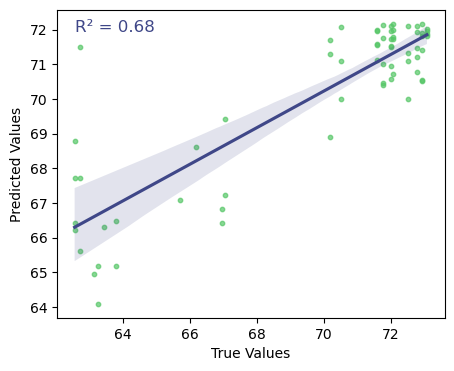

In [34]:
## RH median 

# Load predictions from QIIME2
predictions = Artifact.load("Climate-Regression/median_rh/predictions.qza").view(pd.Series)

# Extract true values (ensure indices match)
true_values = metadata.loc[predictions.index, "median_rh"] 

# Create scatterplot
plt.figure(figsize=(5, 4))
sns.regplot(x=true_values, y=predictions, 
            scatter_kws={'s': 10, 'color': '#56C667FF', 'alpha':0.7}, 
            line_kws={'color': '#3F4788FF'})

# Compute R² score
r2 = r2_score(true_values, predictions)

# Adjust text position slightly down
y_text_position = np.max(predictions) - 0.03 * (np.max(predictions) - np.min(predictions))

plt.text(np.min(true_values), y_text_position, f"R² = {r2:.2f}", 
         fontsize=12, color="#3F4788FF")

# Labels and title
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
#plt.title("Predicted vs. True Values (Regression)")

plt.show()

/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/q2_sample_classifier/_transformer.py:69: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  return pd.to_numeric(df.iloc[:, 0], errors='ignore')


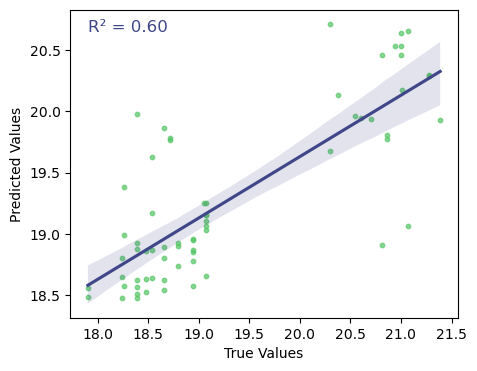

In [36]:
## median_temperature 

# Load predictions from QIIME2
predictions = Artifact.load("Climate-Regression/median_temperature/predictions.qza").view(pd.Series)

# Extract true values (ensure indices match)
true_values = metadata.loc[predictions.index, "median_temperature"] 

# Create scatterplot
plt.figure(figsize=(5, 4))
sns.regplot(x=true_values, y=predictions, 
            scatter_kws={'s': 10, 'color': '#56C667FF', 'alpha':0.7}, 
            line_kws={'color': '#3F4788FF'})

# Compute R² score
r2 = r2_score(true_values, predictions)

# Adjust text position slightly down
y_text_position = np.max(predictions) - 0.03 * (np.max(predictions) - np.min(predictions))

plt.text(np.min(true_values), y_text_position, f"R² = {r2:.2f}", 
         fontsize=12, color="#3F4788FF")

# Labels and title
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
#plt.title("Predicted vs. True Values (Regression)")

plt.show()

/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/q2_sample_classifier/_transformer.py:69: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  return pd.to_numeric(df.iloc[:, 0], errors='ignore')


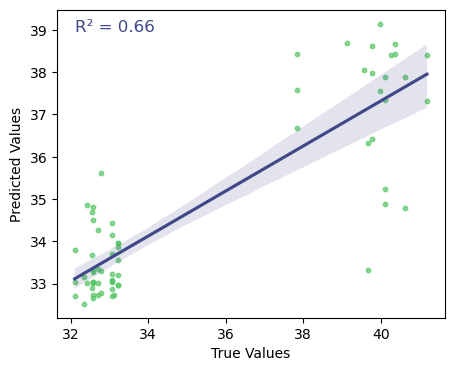

In [35]:
## RH min  

# Load predictions from QIIME2
predictions = Artifact.load("Climate-Regression/minimum_rh/predictions.qza").view(pd.Series)

# Extract true values (ensure indices match)
true_values = metadata.loc[predictions.index, "minimum_rh"] 

# Create scatterplot
plt.figure(figsize=(5, 4))
sns.regplot(x=true_values, y=predictions, 
            scatter_kws={'s': 10, 'color': '#56C667FF', 'alpha':0.7}, 
            line_kws={'color': '#3F4788FF'})

# Compute R² score
r2 = r2_score(true_values, predictions)

# Adjust text position slightly down
y_text_position = np.max(predictions) - 0.03 * (np.max(predictions) - np.min(predictions))

plt.text(np.min(true_values), y_text_position, f"R² = {r2:.2f}", 
         fontsize=12, color="#3F4788FF")

# Labels and title
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
#plt.title("Predicted vs. True Values (Regression)")

plt.show()